In [1]:
import pandas as pd

In [2]:
pd.__version__

'0.14.1'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
tf.logging.set_verbosity(tf.logging.ERROR)
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [5]:
my_feature = pd.Series([1, 3, 5, 7, 9])
my_targets = pd.Series([12, 13, 14, 15, 16])

In [6]:
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(my_feature)

In [7]:
linear_regressor = tf.contrib.learn.LinearRegressor(
    feature_columns=feature_columns,
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.00001),
    enable_centered_bias=True,
    gradient_clip_norm=5.0
)

In [8]:
print("Training model...")
linear_regressor.fit(
    my_feature,
    my_targets,
    steps=1000,
    batch_size=15
)
print("Model training finished.")

Training model...
Model training finished.


In [9]:
predictions = list(linear_regressor.predict(my_feature, as_iterable=True))

print(predictions)

[5.6935482, 5.7917976, 5.8900466, 5.988296, 6.086545]


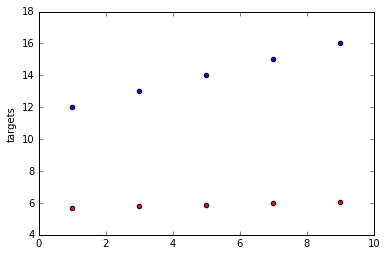

In [10]:
plt.ylabel('targets')
plt.scatter(my_feature, my_targets, c='blue')
plt.scatter(my_feature, predictions, c='red')
plt.show()